In [ ]:
# 필요한 package loading
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.neighbors import KernelDensity
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
# 데이터 생성 함수
np.random.seed(124)

def makeData(N):
    
    x = []
    for i in range(N):
        a = i/1000 + np.random.uniform(-3, 2)
        r = np.random.uniform(-5, 10)
        if(r >= 9.8):
            r = r + 10
        elif(r<(-4.8)):
            r = r +(-10)        
        x.append([a + r])   
    
    return np.array(x)

In [ ]:
# 500개의 샘플 데이터 생성
n = 500
x = makeData(n)
x

array([[ 4.42961323e+00],
       [ 2.66572196e+00],
       [ 3.37869433e+00],
       [-4.89413885e+00],
       [-5.65244486e-01],
       [-5.60971583e+00],
       [-3.69632363e+00],
       [ 5.14329862e+00],
       [ 1.21584450e+00],
       [ 6.24063837e+00],
       [ 1.93503781e+00],
       [-1.74640548e+00],
       [ 6.40110931e+00],
       [-9.16461575e-01],
       [ 2.70343524e+00],
       [ 4.22168386e+00],
       [-4.83101159e+00],
       [-4.91725101e+00],
       [ 5.60196213e+00],
       [ 4.71068843e+00],
       [ 9.98688142e+00],
       [ 8.49504885e-01],
       [-2.99734120e+00],
       [-3.52436499e+00],
       [ 1.27312025e-01],
       [-4.60769518e+00],
       [-2.31140266e+00],
       [ 5.25688512e+00],
       [-4.98431950e+00],
       [-1.08554867e-01],
       [-3.64543367e-01],
       [-3.94393257e+00],
       [ 6.70674331e+00],
       [ 7.64776799e+00],
       [ 8.96658306e+00],
       [ 9.29551844e+00],
       [-3.71945203e+00],
       [ 6.52804906e+00],
       [ 6.2

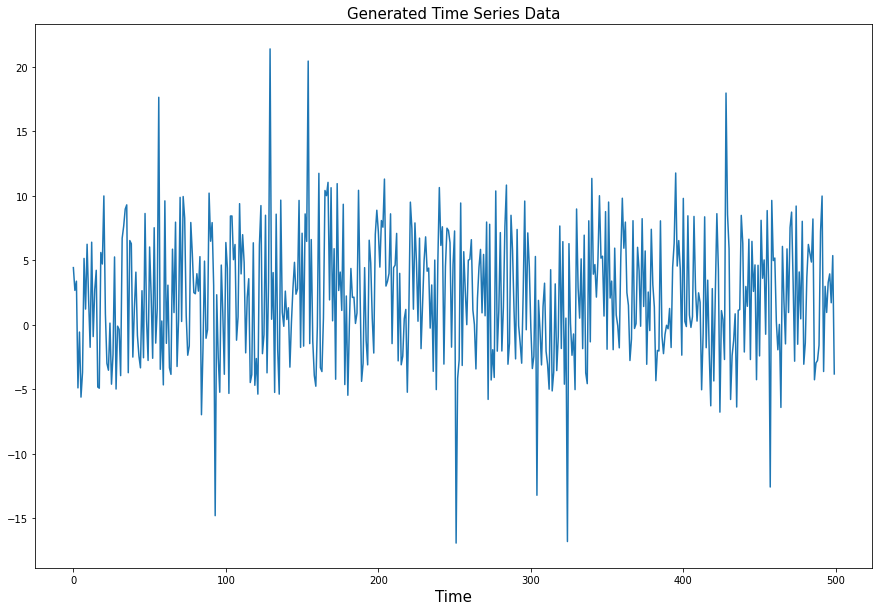

In [ ]:
# visualize the generated data
x_ax = range(n)
plt.figure(figsize = (15, 10))
plt.plot(x_ax, x)
plt.xlabel('Time', fontsize = 15)
plt.title('Generated Time Series Data', fontsize = 15)
plt.show() 

In [ ]:
# data scaling using variance
x = scale(x)

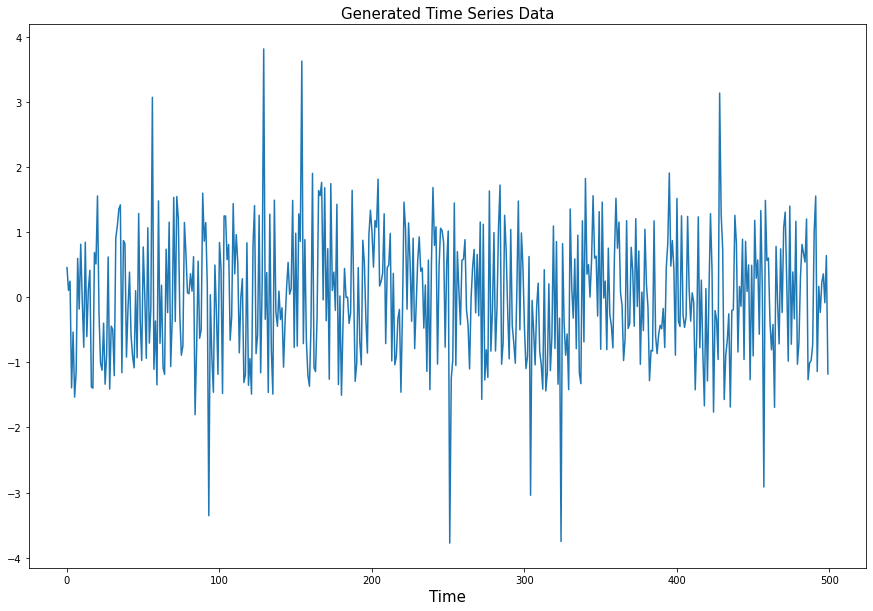

In [ ]:
# visualize the scaled data
x_ax = range(n)
plt.figure(figsize = (15, 10))
plt.plot(x_ax, x)
plt.xlabel('Time', fontsize = 15)
plt.title('Generated Time Series Data', fontsize = 15)
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


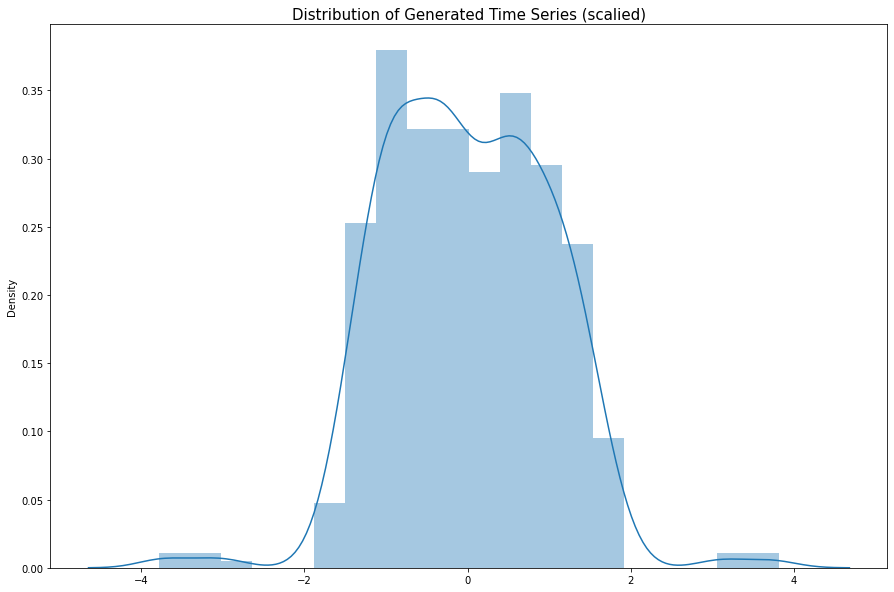

In [ ]:
# visualize the distribution
plt.figure(figsize=(15, 10))
sns.distplot(x)
plt.title('Distribution of Generated Time Series (scalied)', fontsize = 15)
plt.show()

In [ ]:
# dataframe 만들기
data = pd.DataFrame(x)
data['label'] = pd.Series()
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


,0,label
0,0.452624,NaN
1,0.103372,NaN
2,0.244541,NaN
3,-1.393488,NaN
4,-0.536363,NaN
...,...,...
495,0.224300,NaN
496,0.356287,NaN
497,-0.086581,NaN
498,0.637081,NaN


In [ ]:
for i in range(len(data)):
  if abs(data.loc[i, 0]) <= 3:
    data.loc[i, 'label'] = 0
  else:
    data.loc[i, 'label'] = 1

data

,0,label
0,0.452624,0.0
1,0.103372,0.0
2,0.244541,0.0
3,-1.393488,0.0
4,-0.536363,0.0
...,...,...
495,0.224300,0.0
496,0.356287,0.0
497,-0.086581,0.0
498,0.637081,0.0


KDE model train - parameter 설명: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html

In [ ]:
# model train

# kernel: gaussian (default), tophat, epanechnikov, exponential, linear, cosine
# metric: euclidean (default), mantattan, mahalanobis

kernaldens = KernelDensity(algorithm = 'ball_tree', kernel = 'epanechnikov', metric = 'manhattan', bandwidth= 0.01)
kernaldens.fit(x)
print(kernaldens)

KernelDensity(algorithm='ball_tree', bandwidth=0.01, kernel='epanechnikov',
              metric='manhattan')


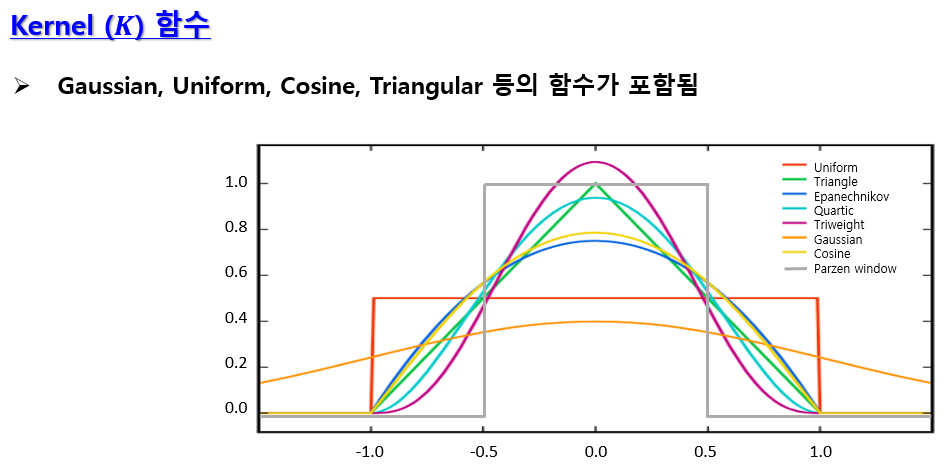

In [ ]:
# 각 sample의 KDE 모델의 negative log-likelihood를 계산
scores = kernaldens.score_samples(x)
scores

array([-0.16652169, -0.27461891, -0.58863585, -1.31457974, -1.89711998,
       -1.89711998, -0.54133001, -0.8232477 , -0.48909058, -0.76728216,
       -1.11800792, -0.36677547, -0.93827681, -1.09240593, -0.82528203,
       -1.46645742, -1.89711998, -1.31457974, -1.89711998, -1.02234619,
       -0.54227599, -1.20465303, -0.67127522, -1.3921185 , -0.75847329,
       -0.80427092, -1.7361456 , -0.71975658, -1.02040634, -0.32395224,
       -0.722877  , -1.21795557, -1.22139698, -0.91050667, -1.21967913,
       -1.74713792, -0.46104729, -0.8936985 , -0.77035277, -1.38722859,
       -0.58690877, -0.66664173, -1.6407779 , -0.55636755, -0.80834468,
       -0.31482674, -1.1513614 , -0.73124848, -0.71504833, -0.53559667,
       -1.22904769, -1.28295455, -1.06121241, -0.92164742, -0.16443133,
       -1.04832954, -1.89711998, -1.3575061 , -0.1939195 , -1.03163492,
       -0.80308825, -0.08812733, -0.92794116, -0.80489036, -0.7123263 ,
       -0.58359371,  0.00765467, -0.45683057, -1.89711998, -0.43

-1.8971199848858813


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


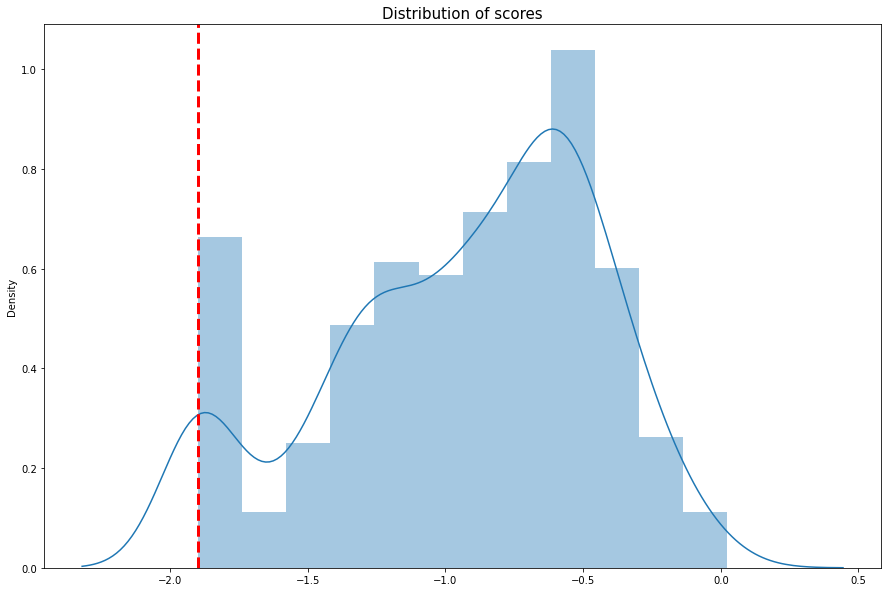

In [ ]:
# scores를 바탕으로 .01분위수로 threshold 설정
thresh = np.quantile(scores, .01)
print(thresh)

# visualize the distribution
plt.figure(figsize=(15, 10))
sns.distplot(scores)
plt.axvline(x=thresh, color='r', linestyle='--', linewidth=3)
plt.title('Distribution of scores', fontsize = 15)
plt.show()

In [ ]:
#threshold를 바탕으로 데이터의 인덱스 설정
index = np.where(scores <= thresh)
values = x[index]

In [ ]:
pd.concat([pd.DataFrame(index).T[0], pd.DataFrame(values)[0]])

0      4.000000
1      5.000000
2     16.000000
3     56.000000
4     70.000000
        ...    
27    -1.765869
28     3.132316
29    -2.915332
30    -0.067241
31    -0.739096
Name: 0, Length: 64, dtype: float64

In [ ]:
# index를 사용해 이상탐지 결과 저장
data['test'] = 0
data.loc[index[0][:], 'test'] = 1

data

,0,label,test
0,0.452624,0.0,0
1,0.103372,0.0,0
2,0.244541,0.0,0
3,-1.393488,0.0,0
4,-0.536363,0.0,1
...,...,...,...
495,0.224300,0.0,0
496,0.356287,0.0,0
497,-0.086581,0.0,0
498,0.637081,0.0,0


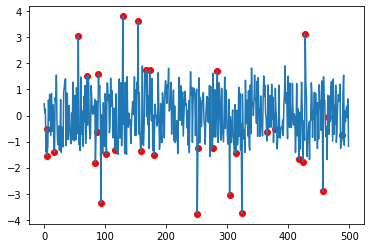

In [ ]:
# visualize the plot
plt.plot(x_ax, x)
plt.scatter(index,values, color='r')
plt.show()


In [ ]:
# evaluation
scores = classification_report(data['label'], data['test'])
print(scores)

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       492
         1.0       0.25      1.00      0.40         8

    accuracy                           0.95       500
   macro avg       0.62      0.98      0.69       500
weighted avg       0.99      0.95      0.97       500



## Practice

In [ ]:
# KDE 모델 parameter tuning (자유롭게 변경 가능)
kernaldens = KernelDensity(algorithm = 'auto', kernel = 'gaussian', metric = 'euclidean', bandwidth= 0.1)
kernaldens.fit(x)
print(kernaldens)

KernelDensity(bandwidth=0.1)


In [ ]:
# 각 sample의 KDE 모델 negative log-likelihood를 계산
scores = kernaldens.score_samples(x)

-4.240340134559715


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


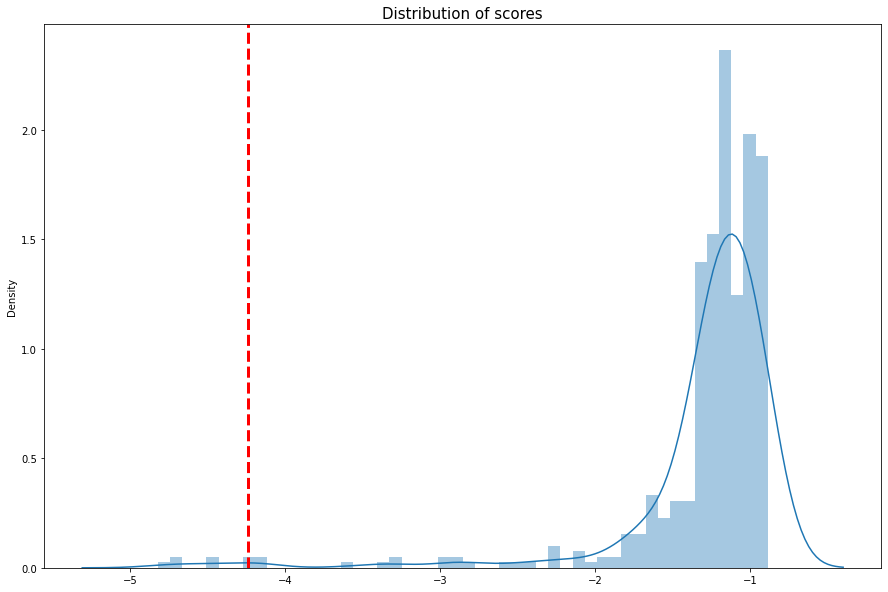

In [ ]:
# scores를 바탕으로 .01분위수로 threshold 설정
thresh = np.quantile(scores, .01)
print(thresh)

# visualize the distribution
plt.figure(figsize=(15, 10))
sns.distplot(scores)
plt.axvline(x=thresh, color='r', linestyle='--', linewidth=3)
plt.title('Distribution of scores', fontsize = 15)
plt.show()

In [ ]:
# threshold를 바탕으로 데이터의 인덱스 설정
index = np.where(scores <= thresh)
values = x[index]

# index를 사용해 이상탐지 결과 저장
data['test'] = 0
data.loc[index[0][:], 'test'] = 1

data

,0,label,test
0,0.452624,0.0,0
1,0.103372,0.0,0
2,0.244541,0.0,0
3,-1.393488,0.0,0
4,-0.536363,0.0,0
...,...,...,...
495,0.224300,0.0,0
496,0.356287,0.0,0
497,-0.086581,0.0,0
498,0.637081,0.0,0


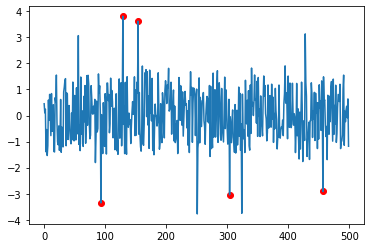

In [ ]:
# visualize the plot
plt.plot(x_ax, x)
plt.scatter(index,values, color='r')
plt.show()

In [ ]:
# performance check
scores = classification_report(data['label'], data['test'])
print(scores)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       492
         1.0       0.80      0.50      0.62         8

    accuracy                           0.99       500
   macro avg       0.90      0.75      0.81       500
weighted avg       0.99      0.99      0.99       500

